In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

%matplotlib inline

### Importing the dataset

In [2]:
train = pd.read_csv('train_ajEneEa.csv')

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [66]:
train.stb.freq(['stroke'])

,stroke,Count,Percent,Cumulative Count,Cumulative Percent
0,0,42617,0.981959,42617,0.981959
1,1,783,0.018041,43400,1.000000


In [4]:
train.info() ## 43400 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Checking Missing values

In [5]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [9]:
for feature in features:
    print("%age of missing values in {} are {} %".format(feature,train[feature].isnull().sum()/len(train)))

%age of missing values in gender are 0.0 %
%age of missing values in age are 0.0 %
%age of missing values in hypertension are 0.0 %
%age of missing values in heart_disease are 0.0 %
%age of missing values in ever_married are 0.0 %
%age of missing values in work_type are 0.0 %
%age of missing values in Residence_type are 0.0 %
%age of missing values in avg_glucose_level are 0.0 %
%age of missing values in bmi are 0.03368663594470046 %
%age of missing values in smoking_status are 0.3062672811059908 %
%age of missing values in stroke are 0.0 %


* There are 3% missing values in bmi
* There are 30% missing values in smoking status

In [10]:
#### Target variable

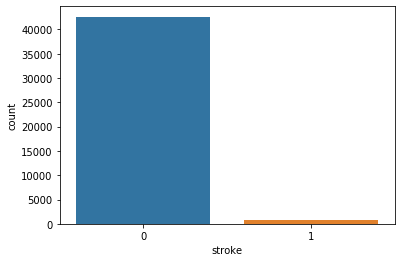

In [11]:
sns.countplot(train['stroke'])

In [12]:
# Classes are imbalanced

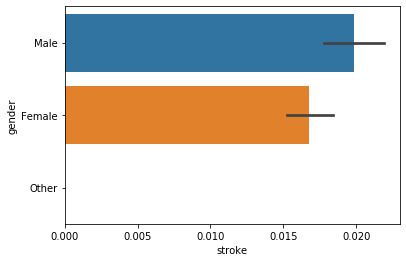

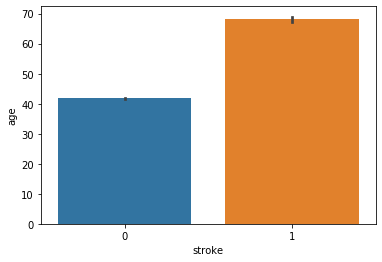

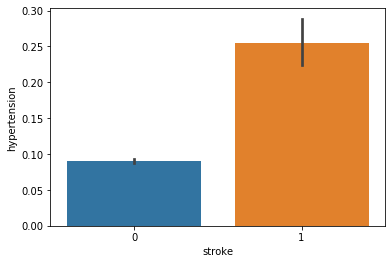

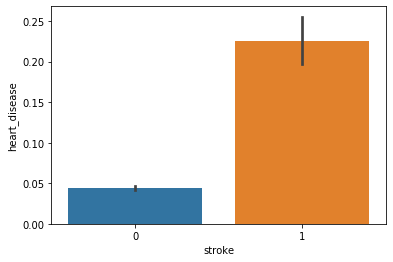

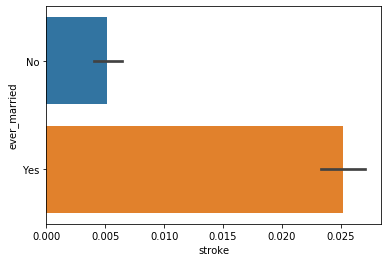

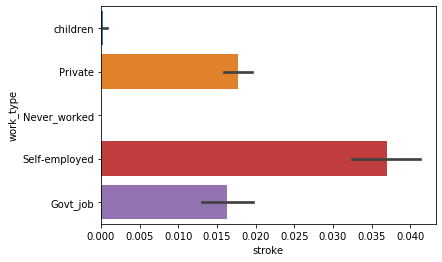

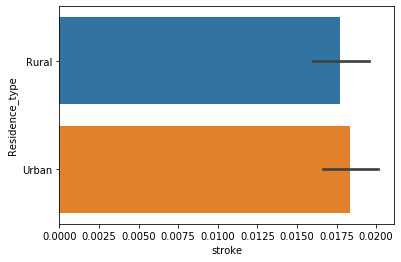

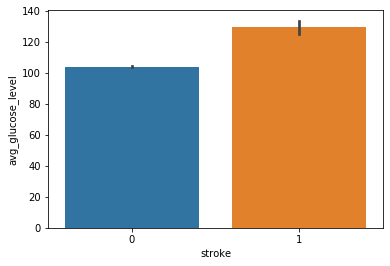

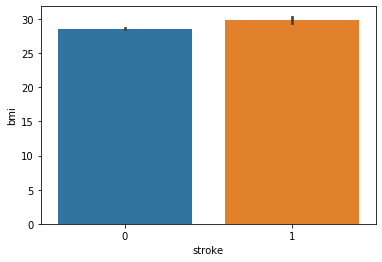

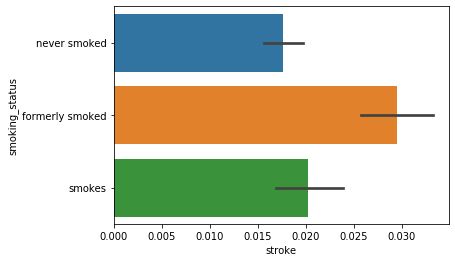

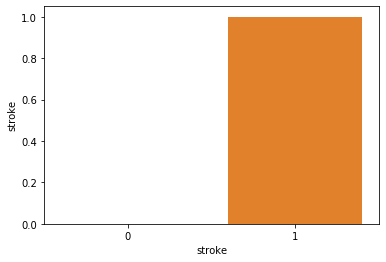

In [15]:
for feature in features :
    data=train.copy()
    sns.barplot(x='stroke',y=feature,data=data)
    plt.show()

## Checking for outliers

In [29]:
numerical_features = [ feature for feature in features if train[feature].dtypes== 'float64']

In [30]:
numerical_features

['age', 'avg_glucose_level', 'bmi']

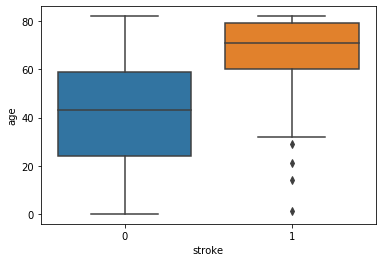

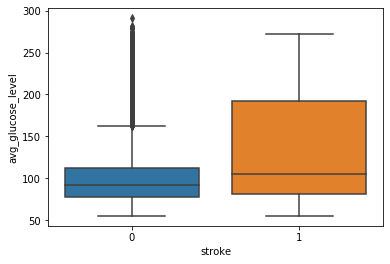

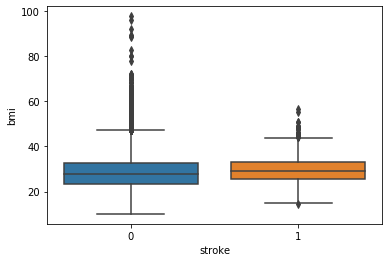

In [31]:
for feature in numerical_features:
    sns.boxplot(x='stroke',y=feature,data=train)
    plt.show()

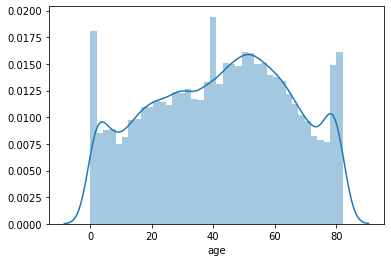

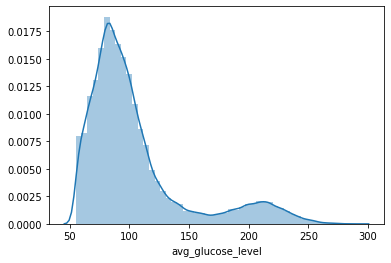

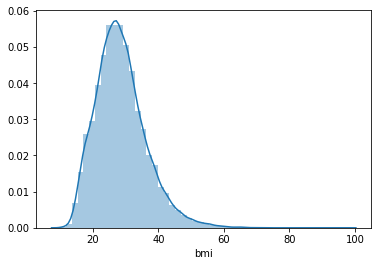

In [42]:
for feature in numerical_features:
    
    sns.distplot(train[feature])
    
    plt.show()

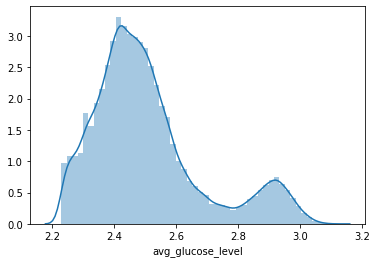

In [43]:
data =train.copy()

x= (data['avg_glucose_level'])**(1/5)
sns.distplot(x)

### Checking missing values in smokers

In [47]:
train['smoking_status_label'] = np.where(train['smoking_status'].isnull()==True,"Unknown",train['smoking_status'])

In [48]:
train['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [49]:
train['smoking_status_label'].value_counts()

never smoked       16053
Unknown            13292
formerly smoked     7493
smokes              6562
Name: smoking_status_label, dtype: int64

In [50]:
train['smoking_status'].isnull().sum()

13292

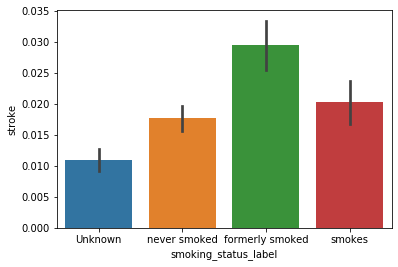

In [51]:
sns.barplot(x='smoking_status_label',y='stroke',data=train)

In [52]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_label
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,Unknown
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,never smoked
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,Unknown
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,formerly smoked
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,Unknown


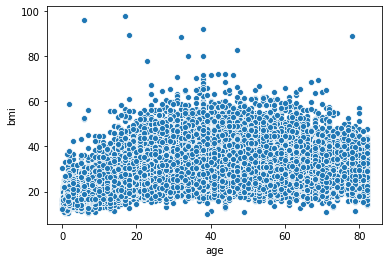

In [53]:
sns.scatterplot(x='age',y='bmi',data=train)

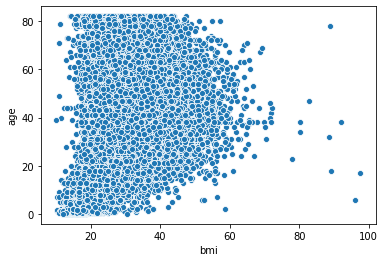

In [54]:
sns.scatterplot(x='bmi',y='age',data=train)

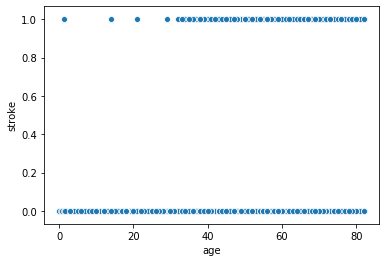

In [58]:
sns.scatterplot(x='age',y='stroke',data=train)

### Residence Type

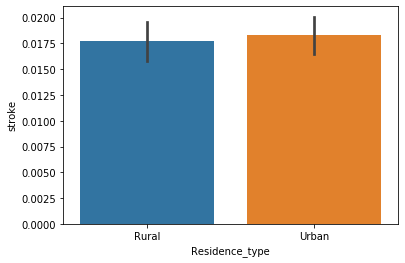

In [60]:
sns.barplot(x='Residence_type',y='stroke',data=train)

###  Work Type

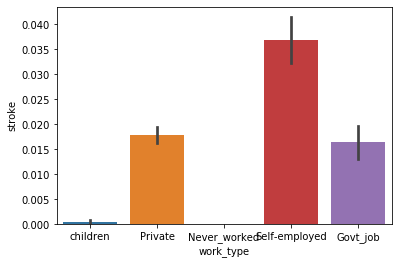

In [61]:
sns.barplot(x='work_type',y='stroke',data=train)

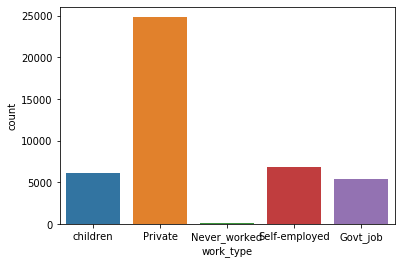

In [62]:
sns.countplot(train['work_type'])

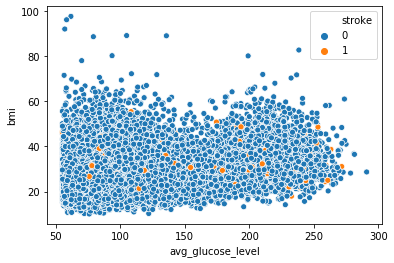

In [68]:
sns.scatterplot(x='avg_glucose_level',y='bmi',hue='stroke',data=train)